# 1 & 2

## Mini Project2 - Question1 
## By Mahsa Massoud & Omid Vaheb
### 810196635 - 810196582

In [30]:
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import pandas_datareader.data as web
import os.path



In [32]:
import pandas as pd
import datetime
import pandas_datareader as pdr 
from pandas import Series, DataFrame 
# start = datetime.datetime(2014, 9, 20) 
# end = datetime.datetime(2021, 5, 20) 
# df = pdr.get_data_yahoo(['BTC-USD'], start=start, end=end) 
# df.tail()

In [33]:
def data_loader():
    a = os.path.isfile('BTC.csv')
    if a is False:
        start = datetime.datetime(2014, 9, 20)
        end = datetime.datetime(2021, 5, 20) 
        df = pdr.get_data_yahoo(['BTC-USD'], start=start, end=end) 
        df.to_csv(r'BTC.csv', sep='\t', encoding='utf-8', header='true')
        df = pd.read_csv('BTC.csv', sep='\t')
    else:
        df = pd.read_csv('BTC.csv', sep='\t')
    return df

In [34]:
df = data_loader()

In [35]:
df.head()

,Attributes,Adj Close,Close,High,Low,Open,Volume
0,Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,408.90399169921875,408.90399169921875,423.2959899902344,389.88299560546875,394.6730041503906,36863600.0
3,2014-09-20,398.8210144042969,398.8210144042969,412.4259948730469,393.1809997558594,408.0849914550781,26580100.0
4,2014-09-21,402.1520080566406,402.1520080566406,406.9159851074219,397.1300048828125,399.1000061035156,24127600.0


In [36]:
df.describe()

,Attributes,Adj Close,Close,High,Low,Open,Volume
count,2434,2433,2433,2433,2433,2433,2433
unique,2427,2430,2430,2430,2432,2429,2433
top,2017-03-26,1179.969970703125,1179.969970703125,6536.919921875,429.0769958496094,314.0790100097656,12545400.0
freq,2,2,2,2,2,2,1


In [37]:
df.isna().sum()

Attributes    0
Adj Close     1
Close         1
High          1
Low           1
Open          1
Volume        1
dtype: int64

In [38]:
type(data_close)


numpy.ndarray

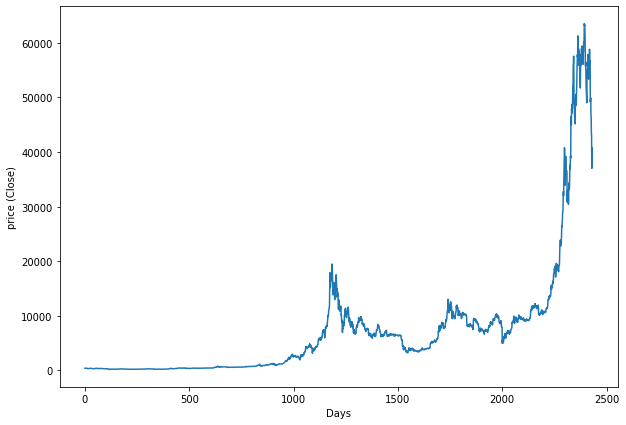

In [39]:
data_close = df['Close'][2:].to_numpy().astype(np.float)
plt.figure(figsize = (10,7))

plt.plot(np.arange(df[2:].shape[0]),data_close )
plt.xlabel('Days')
plt.ylabel('price (Close)')
plt.show()


In [40]:

''' If filling values are necessary '''
# df_apple['Date'] = pd.to_datetime(df_apple['Date'])
# df_apple = df_apple.set_index('Date').asfreq('24h', method='bfill')
# df_apple['Date_col'] = df_apple.index
#
# df_google['Date'] = pd.to_datetime(df_google['Date'])
# df_google = df_google.set_index('Date').asfreq('24h', method='bfill')
# df_google['Date_col'] = df_google.index

''' Merge values '''
df2  =df[2:]




In [41]:

''' data and target '''
data = df2[['High', 'Low', 'Open', 'Volume','Close']].to_numpy()

print(data.shape)



(2432, 5)


In [42]:
'''Scale data '''
from sklearn import preprocessing

# MinMax
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
print(data)



[[3.27239776e-03 3.52001870e-03 3.43783436e-03 8.81834148e-05
  3.64468542e-03]
 [3.10426527e-03 3.57318020e-03 3.64955737e-03 5.88825241e-05
  3.48546046e-03]
 [3.01903877e-03 3.63683538e-03 3.50771946e-03 5.18945886e-05
  3.53806172e-03]
 ...
 [6.70277961e-01 4.91799449e-01 6.75141304e-01 3.60016681e-01
  5.81510186e-01]
 [6.53524520e-01 5.62226598e-01 5.77404669e-01 2.51525869e-01
  6.41206605e-01]
 [6.49026355e-01 5.39108885e-01 6.38075103e-01 2.33773730e-01
  5.86283156e-01]]


In [43]:
def data_for_training(data_s1, period1):
    a1 = np.arange(len(data_s1) - period1 + 1)
    data_list1 = []
    for i in range(len(a1)):
        sample_list = []
        for j in range(period1):
            value1 = data_s1[i + j]
            sample_list.append(value1)
        data_list1.append(sample_list)
    data_list1 = np.array(data_list1)
    # np.random.shuffle(data_list1)
    return data_list1



In [44]:
period = 25
data_list = data_for_training(data, period)
print(data_list.shape)
target_list = np.zeros((len(data_list), 1))
for i in range(len(data_list)):
    value = data_list[i][24][4]
    target_list[i][0] = value

data_list = data_list[:, :24, :]
print(data_list.shape)
print(target_list.shape)
print(target_list)



(2408, 25, 5)
(2408, 24, 5)
(2408, 1)
[[0.00351782]
 [0.00342154]
 [0.00322861]
 ...
 [0.58151019]
 [0.64120661]
 [0.58628316]]


In [45]:
''' Split data '''
my_test_size = 0.1
ratio_train = int((1 - my_test_size) * len(data_list))
x_train = data_list[:ratio_train]
x_test = data_list[ratio_train:]
y_train = target_list[:ratio_train]
y_test = target_list[ratio_train:]


In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split

In [47]:
#LSTM

In [70]:
%time
model = Sequential()
model.add(LSTM(50, batch_input_shape=(None, 24, 5), return_sequences=True, recurrent_dropout=0))
model.add(LSTM(50, return_sequences=False, recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 24, 50)            11200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 102       
Total params: 31,502
Trainable params: 31,502
Non-trainable params: 0
_________________________________________________________________


In [71]:
%time
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.44 µs
Epoch 1/15
73/73 [==============================] - 7s 38ms/step - loss: 8.2805e-04 - mae: 0.0178 - val_loss: 2.4060e-04 - val_mae: 0.0130
Epoch 2/15
73/73 [==============================] - 2s 24ms/step - loss: 1.4779e-04 - mae: 0.0068 - val_loss: 1.1518e-04 - val_mae: 0.0077
Epoch 3/15
73/73 [==============================] - 2s 24ms/step - loss: 8.1014e-05 - mae: 0.0044 - val_loss: 9.7137e-05 - val_mae: 0.0071
Epoch 4/15
73/73 [==============================] - 2s 24ms/step - loss: 7.6601e-05 - mae: 0.0048 - val_loss: 1.7771e-04 - val_mae: 0.0107
Epoch 5/15
73/73 [==============================] - 2s 24ms/step - loss: 6.8072e-05 - mae: 0.0047 - val_loss: 1.1936e-04 - val_mae: 0.0082
Epoch 6/15
73/73 [==============================] - 2s 25ms/step - loss: 6.9206e-05 - mae: 0.0041 - val_loss: 7.7156e-05 - val_mae: 0.0061
Epoch 7/15
73/73 [==============================] - 2s 24ms/step - loss: 7.0795e-05 - mae: 0.0049 

8/8 [==============================] - 0s 7ms/step - loss: 0.0093 - mae: 0.0702
train loss: 5.333559965947643e-05, train acc: 0.00415391568094492
test loss: 0.009275335818529129, test acc: 0.0701601505279541


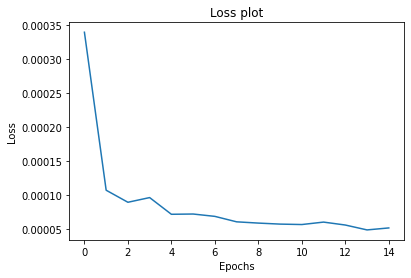

In [50]:
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [51]:


def output_inversed(scaler1, y_test1):
    arr = np.zeros((len(y_test1), 5))
    arr[:, 3:] = y_test1[:, :]
    arr_y_test = scaler1.inverse_transform(arr)
    arr_y_test = arr_y_test[:, 4:]
    # print(arr_y_test.shape)
    return arr_y_test


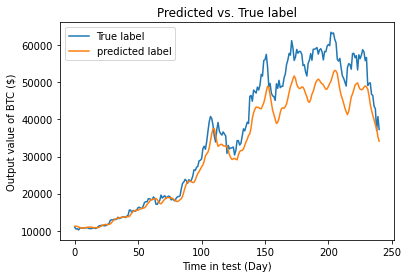

In [52]:
results_test = model.predict(x_test)
arr_y_test = output_inversed(scaler, y_test)
arr_results_test = output_inversed(scaler, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

plt.xlabel('Time in test (Day)')
plt.ylabel('Output value of BTC ($)')
plt.title('Predicted vs. True label')
plt.show()


8/8 [==============================] - 0s 7ms/step - loss: 0.0093 - mae: 0.0702


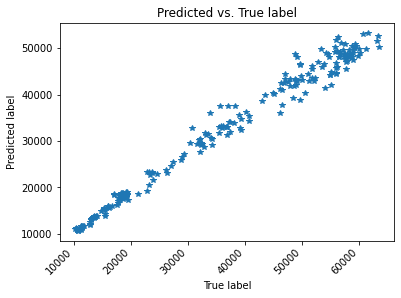

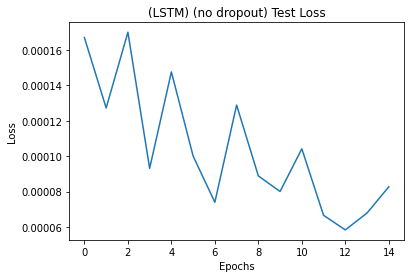

In [53]:

results = model.evaluate(x_test, y_test)
plt.plot(arr_y_test, arr_results_test, '*')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Predicted vs. True label')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('(LSTM) (no dropout) Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [54]:
#GRU
from keras.layers import GRU

In [72]:
%time
model = Sequential()
model.add(GRU(100, batch_input_shape=(None, 24,5 ), recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 100)               32100     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 202       
Total params: 32,302
Trainable params: 32,302
Non-trainable params: 0
_________________________________________________________________


In [73]:
%time
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11.4 µs
Epoch 1/15
73/73 [==============================] - 4s 24ms/step - loss: 0.0058 - mae: 0.0481 - val_loss: 0.0204 - val_mae: 0.1409
Epoch 2/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0056 - mae: 0.0470 - val_loss: 0.0204 - val_mae: 0.1409
Epoch 3/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0065 - mae: 0.0520 - val_loss: 0.0204 - val_mae: 0.1409
Epoch 4/15
73/73 [==============================] - 1s 17ms/step - loss: 0.0060 - mae: 0.0500 - val_loss: 0.0204 - val_mae: 0.1409
Epoch 5/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0058 - mae: 0.0476 - val_loss: 0.0204 - val_mae: 0.1409
Epoch 6/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0061 - mae: 0.0500 - val_loss: 0.0204 - val_mae: 0.1409
Epoch 7/15
73/73 [==============================] - 1s 17ms/step - loss: 0.0062 - mae: 0.0502 - val_loss: 0.0204 - val_mae: 0.1409
Epoch 8/15
73/73 [=

8/8 [==============================] - 0s 5ms/step - loss: 0.0020 - mae: 0.0318
train loss: 2.955646050395444e-05, train acc: 0.0035352364648133516
test loss: 0.001978930551558733, test acc: 0.031842220574617386


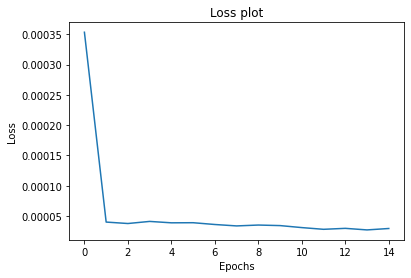

In [62]:
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


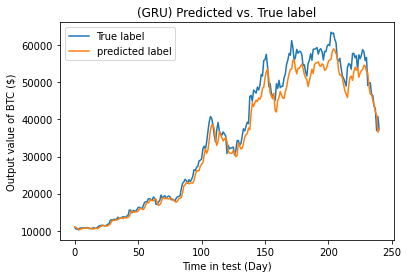

In [63]:


results_test = model.predict(x_test)
arr_y_test = output_inversed(scaler, y_test)
arr_results_test = output_inversed(scaler, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

plt.xlabel('Time in test (Day)')
plt.ylabel('Output value of BTC ($)')
plt.title('(GRU) Predicted vs. True label')
plt.show()

8/8 [==============================] - 0s 5ms/step - loss: 0.0020 - mae: 0.0318


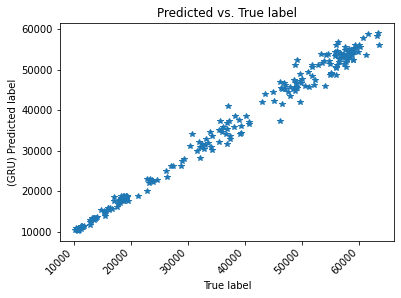

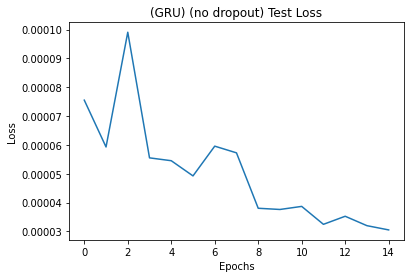

In [64]:
results = model.evaluate(x_test, y_test)
plt.plot(arr_y_test, arr_results_test, '*')
plt.xlabel('True label')
plt.ylabel('(GRU) Predicted label')
plt.title('Predicted vs. True label')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('(GRU) (no dropout) Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [65]:
#RNN
from keras.layers import SimpleRNN

In [74]:
%time
model = Sequential()
model.add(SimpleRNN(units=100, input_shape=x_train.shape[1:], activation="relu", recurrent_dropout=0.0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 100)               10600     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 202       
Total params: 10,802
Trainable params: 10,802
Non-trainable params: 0
_________________________________________________________________


In [75]:
%time
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
Epoch 1/15
73/73 [==============================] - 3s 15ms/step - loss: 0.0017 - mae: 0.0216 - val_loss: 6.2889e-05 - val_mae: 0.0054
Epoch 2/15
73/73 [==============================] - 1s 7ms/step - loss: 4.0611e-05 - mae: 0.0034 - val_loss: 5.3686e-05 - val_mae: 0.0050
Epoch 3/15
73/73 [==============================] - 1s 7ms/step - loss: 4.6231e-05 - mae: 0.0032 - val_loss: 4.1965e-05 - val_mae: 0.0045
Epoch 4/15
73/73 [==============================] - 1s 7ms/step - loss: 3.5311e-05 - mae: 0.0030 - val_loss: 3.8787e-05 - val_mae: 0.0043
Epoch 5/15
73/73 [==============================] - 1s 7ms/step - loss: 2.8144e-05 - mae: 0.0024 - val_loss: 4.1281e-05 - val_mae: 0.0046
Epoch 6/15
73/73 [==============================] - 1s 7ms/step - loss: 3.8692e-05 - mae: 0.0030 - val_loss: 5.1161e-05 - val_mae: 0.0051
Epoch 7/15
73/73 [==============================] - 1s 8ms/step - loss: 3.7693e-05 - mae: 0.0030 - val_loss: 5.

8/8 [==============================] - 0s 3ms/step - loss: 0.0019 - mae: 0.0323
train loss: 3.0501216315315105e-05, train acc: 0.002925206208601594
test loss: 0.0018786207074299455, test acc: 0.03226206824183464


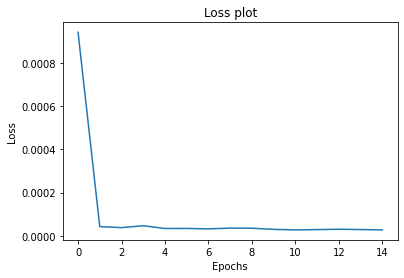

In [68]:
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


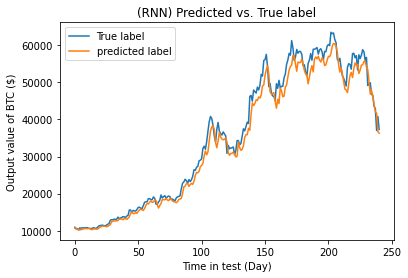

In [69]:

results_test = model.predict(x_test)
arr_y_test = output_inversed(scaler, y_test)
arr_results_test = output_inversed(scaler, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

plt.xlabel('Time in test (Day)')
plt.ylabel('Output value of BTC ($)')
plt.title('(RNN) Predicted vs. True label')
plt.show()

8/8 [==============================] - 0s 3ms/step - loss: 0.0014 - mae: 0.0262


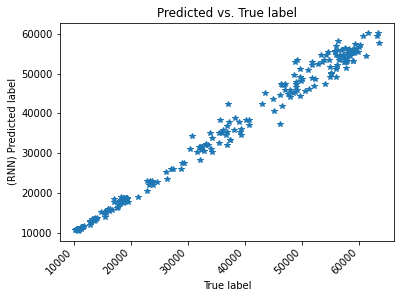

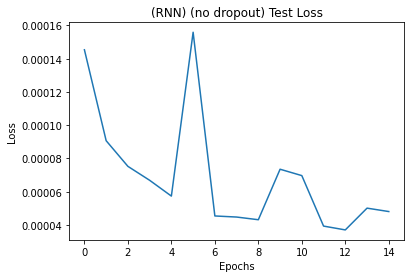

In [ ]:
results = model.evaluate(x_test, y_test)
plt.plot(arr_y_test, arr_results_test, '*')
plt.xlabel('True label')
plt.ylabel('(RNN) Predicted label')
plt.title('Predicted vs. True label')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('(RNN) (no dropout) Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Best performance : GRU

# MSE :

In [83]:
model = Sequential()
model.add(GRU(100, batch_input_shape=(None, 24,5 ), recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_9 (GRU)                  (None, 100)               32100     
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 202       
Total params: 32,302
Trainable params: 32,302
Non-trainable params: 0
_________________________________________________________________


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
Epoch 1/15
73/73 [==============================] - 5s 25ms/step - loss: 0.0016 - mae: 0.0223 - val_loss: 7.3665e-05 - val_mae: 0.0058
Epoch 2/15
73/73 [==============================] - 1s 16ms/step - loss: 5.5462e-05 - mae: 0.0042 - val_loss: 5.6308e-05 - val_mae: 0.0051
Epoch 3/15
73/73 [==============================] - 1s 16ms/step - loss: 5.4860e-05 - mae: 0.0042 - val_loss: 5.3085e-05 - val_mae: 0.0048
Epoch 4/15
73/73 [==============================] - 1s 17ms/step - loss: 3.4100e-05 - mae: 0.0030 - val_loss: 5.6220e-05 - val_mae: 0.0052
Epoch 5/15
73/73 [==============================] - 1s 16ms/step - loss: 3.1816e-05 - mae: 0.0031 - val_loss: 8.2920e-05 - val_mae: 0.0074
Epoch 6/15
73/73 [==============================] - 1s 17ms/step - loss: 3.5282e-05 - mae: 0.0038 - val_loss: 4.0887e-05 - val_mae: 0.0044
Epoch 7/15
73/73 [==============================] - 1s 17ms/step - loss: 3.8974e-05 - mae: 0.0034 - val_lo

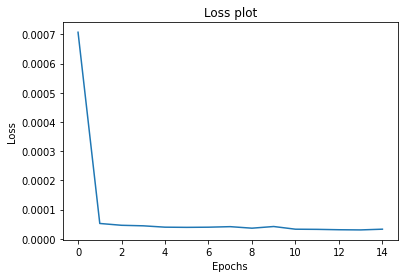

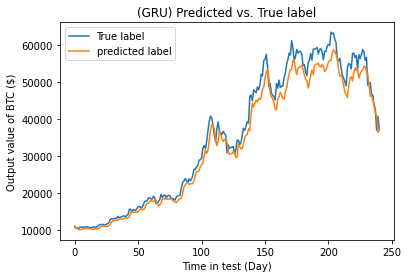

In [84]:
%time
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

results_test = model.predict(x_test)
arr_y_test = output_inversed(scaler, y_test)
arr_results_test = output_inversed(scaler, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

plt.xlabel('Time in test (Day)')
plt.ylabel('Output value of BTC ($)')
plt.title('(GRU) Predicted vs. True label')
plt.show()

8/8 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0315


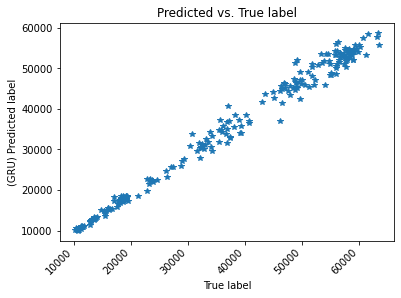

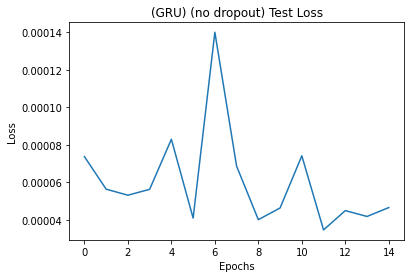

In [85]:
results = model.evaluate(x_test, y_test)
plt.plot(arr_y_test, arr_results_test, '*')
plt.xlabel('True label')
plt.ylabel('(GRU) Predicted label')
plt.title('Predicted vs. True label')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('(GRU) (no dropout) Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

##MAE :

In [96]:
model = Sequential()
model.add(GRU(100, batch_input_shape=(None, 24,5 ), recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_15 (GRU)                 (None, 100)               32100     
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 202       
Total params: 32,302
Trainable params: 32,302
Non-trainable params: 0
_________________________________________________________________


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
Epoch 1/15
73/73 [==============================] - 4s 24ms/step - loss: 0.0129 - mae: 0.0129 - val_loss: 0.0054 - val_mae: 0.0054
Epoch 2/15
73/73 [==============================] - 1s 17ms/step - loss: 0.0034 - mae: 0.0034 - val_loss: 0.0130 - val_mae: 0.0130
Epoch 3/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0040 - mae: 0.0040 - val_loss: 0.0048 - val_mae: 0.0048
Epoch 4/15
73/73 [==============================] - 1s 17ms/step - loss: 0.0030 - mae: 0.0030 - val_loss: 0.0044 - val_mae: 0.0044
Epoch 5/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0029 - mae: 0.0029 - val_loss: 0.0044 - val_mae: 0.0044
Epoch 6/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0027 - mae: 0.0027 - val_loss: 0.0056 - val_mae: 0.0056
Epoch 7/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0029 - mae: 0.0029 - val_loss: 0.0061 - val_mae: 0.0061
Epoch 8/15
73/73 [=

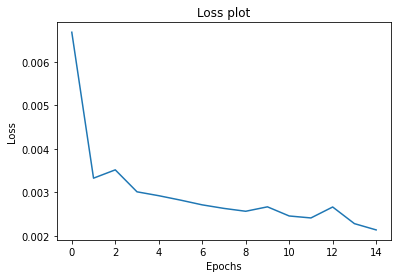

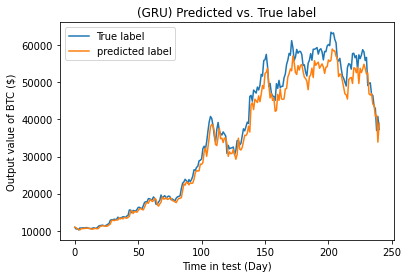

In [97]:
%time
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

results_test = model.predict(x_test)
arr_y_test = output_inversed(scaler, y_test)
arr_results_test = output_inversed(scaler, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

plt.xlabel('Time in test (Day)')
plt.ylabel('Output value of BTC ($)')
plt.title('(GRU) Predicted vs. True label')
plt.show()

##Optimizers

In [106]:
model = Sequential()
model.add(GRU(100, batch_input_shape=(None, 24,5 ), recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_19 (GRU)                 (None, 100)               32100     
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 202       
Total params: 32,302
Trainable params: 32,302
Non-trainable params: 0
_________________________________________________________________


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
Epoch 1/15
73/73 [==============================] - 4s 23ms/step - loss: 0.0035 - mae: 0.0327 - val_loss: 0.0103 - val_mae: 0.0748
Epoch 2/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0031 - mae: 0.0273 - val_loss: 0.0102 - val_mae: 0.0729
Epoch 3/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0031 - mae: 0.0271 - val_loss: 0.0102 - val_mae: 0.0727
Epoch 4/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0029 - mae: 0.0258 - val_loss: 0.0102 - val_mae: 0.0729
Epoch 5/15
73/73 [==============================] - 1s 17ms/step - loss: 0.0032 - mae: 0.0274 - val_loss: 0.0102 - val_mae: 0.0726
Epoch 6/15
73/73 [==============================] - 1s 17ms/step - loss: 0.0031 - mae: 0.0271 - val_loss: 0.0102 - val_mae: 0.0726
Epoch 7/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0030 - mae: 0.0262 - val_loss: 0.0102 - val_mae: 0.0725
Epoch 8/15
73/73 [=

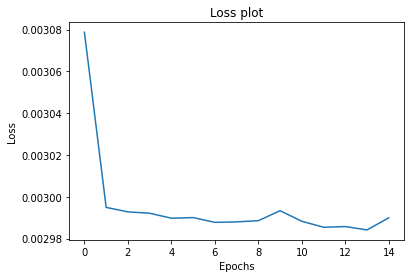

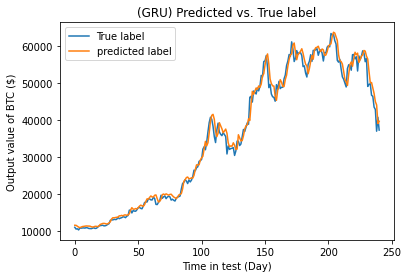

In [89]:
%time
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

results_test = model.predict(x_test)
arr_y_test = output_inversed(scaler, y_test)
arr_results_test = output_inversed(scaler, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

plt.xlabel('Time in test (Day)')
plt.ylabel('Output value of BTC ($)')
plt.title('(GRU) Predicted vs. True label')
plt.show()


In [107]:
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )

results = model.evaluate(x_test, y_test)
print(np.mean(history.history['val_loss']))

Epoch 1/15
73/73 [==============================] - 4s 25ms/step - loss: 0.0016 - mae: 0.0218 - val_loss: 6.2623e-05 - val_mae: 0.0053
Epoch 2/15
73/73 [==============================] - 1s 16ms/step - loss: 4.3437e-05 - mae: 0.0036 - val_loss: 7.4889e-05 - val_mae: 0.0066
Epoch 3/15
73/73 [==============================] - 1s 17ms/step - loss: 6.3431e-05 - mae: 0.0045 - val_loss: 5.3456e-05 - val_mae: 0.0051
Epoch 4/15
73/73 [==============================] - 1s 17ms/step - loss: 5.0709e-05 - mae: 0.0040 - val_loss: 4.0961e-05 - val_mae: 0.0043
Epoch 5/15
73/73 [==============================] - 1s 16ms/step - loss: 4.7204e-05 - mae: 0.0042 - val_loss: 4.7096e-05 - val_mae: 0.0048
Epoch 6/15
73/73 [==============================] - 1s 17ms/step - loss: 3.6579e-05 - mae: 0.0030 - val_loss: 4.4000e-05 - val_mae: 0.0048
Epoch 7/15
73/73 [==============================] - 1s 17ms/step - loss: 3.8161e-05 - mae: 0.0033 - val_loss: 4.4545e-05 - val_mae: 0.0046
Epoch 8/15
73/73 [=============

MSE and ADAgrad

In [108]:
model = Sequential()
model.add(GRU(100, batch_input_shape=(None, 24,5 ), recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='ADAgrad', metrics=['mae'])
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_20 (GRU)                 (None, 100)               32100     
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 202       
Total params: 32,302
Trainable params: 32,302
Non-trainable params: 0
_________________________________________________________________


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
Epoch 1/15
73/73 [==============================] - 4s 25ms/step - loss: 0.0040 - mae: 0.0393 - val_loss: 0.0129 - val_mae: 0.1062
Epoch 2/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0039 - mae: 0.0404 - val_loss: 0.0123 - val_mae: 0.1021
Epoch 3/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0034 - mae: 0.0385 - val_loss: 0.0121 - val_mae: 0.1000
Epoch 4/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0038 - mae: 0.0399 - val_loss: 0.0119 - val_mae: 0.0989
Epoch 5/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0036 - mae: 0.0390 - val_loss: 0.0118 - val_mae: 0.0981
Epoch 6/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0037 - mae: 0.0399 - val_loss: 0.0118 - val_mae: 0.0979
Epoch 7/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0040 - mae: 0.0410 - val_loss: 0.0118 - val_mae: 0.0977
Epoch 8/15
73/73 [=

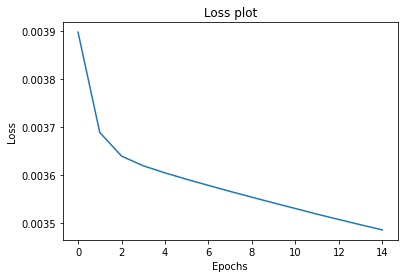

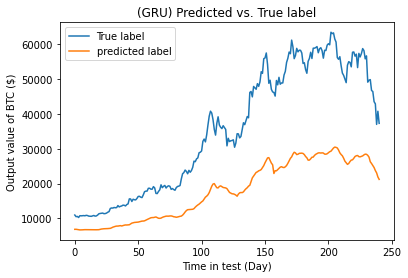

In [91]:
%time
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

results_test = model.predict(x_test)
arr_y_test = output_inversed(scaler, y_test)
arr_results_test = output_inversed(scaler, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

plt.xlabel('Time in test (Day)')
plt.ylabel('Output value of BTC ($)')
plt.title('(GRU) Predicted vs. True label')
plt.show()

In [109]:
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )

results = model.evaluate(x_test, y_test)
print(np.mean(history.history['val_loss']))

Epoch 1/15
73/73 [==============================] - 5s 25ms/step - loss: 0.0042 - mae: 0.0409 - val_loss: 0.0098 - val_mae: 0.0963
Epoch 2/15
73/73 [==============================] - 1s 17ms/step - loss: 0.0028 - mae: 0.0393 - val_loss: 0.0078 - val_mae: 0.0855
Epoch 3/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0026 - mae: 0.0398 - val_loss: 0.0068 - val_mae: 0.0798
Epoch 4/15
73/73 [==============================] - 1s 17ms/step - loss: 0.0027 - mae: 0.0413 - val_loss: 0.0065 - val_mae: 0.0779
Epoch 5/15
73/73 [==============================] - 1s 17ms/step - loss: 0.0024 - mae: 0.0401 - val_loss: 0.0063 - val_mae: 0.0762
Epoch 6/15
73/73 [==============================] - 1s 17ms/step - loss: 0.0024 - mae: 0.0399 - val_loss: 0.0060 - val_mae: 0.0744
Epoch 7/15
73/73 [==============================] - 1s 17ms/step - loss: 0.0023 - mae: 0.0402 - val_loss: 0.0058 - val_mae: 0.0732
Epoch 8/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0023 - m

MSE and SGD

In [110]:
model = Sequential()
model.add(GRU(100, batch_input_shape=(None, 24,5 ), recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='SGD', metrics=['mae'])
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_21 (GRU)                 (None, 100)               32100     
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 202       
Total params: 32,302
Trainable params: 32,302
Non-trainable params: 0
_________________________________________________________________


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
Epoch 1/15
73/73 [==============================] - 4s 24ms/step - loss: 0.0035 - mae: 0.0384 - val_loss: 0.0072 - val_mae: 0.0803
Epoch 2/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0026 - mae: 0.0408 - val_loss: 0.0061 - val_mae: 0.0745
Epoch 3/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0024 - mae: 0.0392 - val_loss: 0.0057 - val_mae: 0.0717
Epoch 4/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0022 - mae: 0.0374 - val_loss: 0.0052 - val_mae: 0.0683
Epoch 5/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0021 - mae: 0.0366 - val_loss: 0.0049 - val_mae: 0.0666
Epoch 6/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0020 - mae: 0.0358 - val_loss: 0.0047 - val_mae: 0.0653
Epoch 7/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0017 - mae: 0.0328 - val_loss: 0.0041 - val_mae: 0.0609
Epoch 8/15
73/73 [=

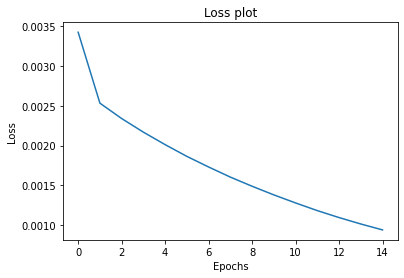

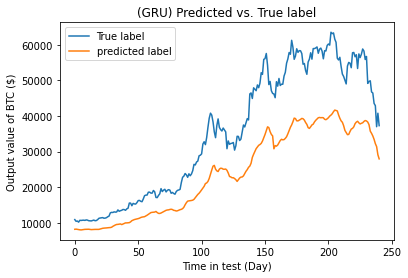

In [99]:
%time
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

results_test = model.predict(x_test)
arr_y_test = output_inversed(scaler, y_test)
arr_results_test = output_inversed(scaler, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

plt.xlabel('Time in test (Day)')
plt.ylabel('Output value of BTC ($)')
plt.title('(GRU) Predicted vs. True label')
plt.show()

In [111]:
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )

results = model.evaluate(x_test, y_test)
print(np.mean(history.history['val_loss']))

Epoch 1/15
73/73 [==============================] - 4s 25ms/step - loss: 0.0050 - mae: 0.0461 - val_loss: 0.0136 - val_mae: 0.1101
Epoch 2/15
73/73 [==============================] - 1s 17ms/step - loss: 0.0044 - mae: 0.0453 - val_loss: 0.0130 - val_mae: 0.1064
Epoch 3/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0041 - mae: 0.0453 - val_loss: 0.0128 - val_mae: 0.1053
Epoch 4/15
73/73 [==============================] - 1s 17ms/step - loss: 0.0038 - mae: 0.0424 - val_loss: 0.0126 - val_mae: 0.1034
Epoch 5/15
73/73 [==============================] - 1s 16ms/step - loss: 0.0043 - mae: 0.0442 - val_loss: 0.0124 - val_mae: 0.1024
Epoch 6/15
73/73 [==============================] - 1s 17ms/step - loss: 0.0040 - mae: 0.0437 - val_loss: 0.0123 - val_mae: 0.1018
Epoch 7/15
73/73 [==============================] - 1s 17ms/step - loss: 0.0041 - mae: 0.0440 - val_loss: 0.0123 - val_mae: 0.1016
Epoch 8/15
73/73 [==============================] - 1s 17ms/step - loss: 0.0038 - m

RMSProp

In [114]:
model = Sequential()
model.add(GRU(100, batch_input_shape=(None, 24,5 ), recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='RMSProp', metrics=['mae'])
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_23 (GRU)                 (None, 100)               32100     
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 202       
Total params: 32,302
Trainable params: 32,302
Non-trainable params: 0
_________________________________________________________________


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.78 µs
Epoch 1/15
73/73 [==============================] - 4s 24ms/step - loss: 8.0860e-04 - mae: 0.0150 - val_loss: 2.1434e-04 - val_mae: 0.0123
Epoch 2/15
73/73 [==============================] - 1s 16ms/step - loss: 1.1900e-04 - mae: 0.0072 - val_loss: 5.0437e-04 - val_mae: 0.0202
Epoch 3/15
73/73 [==============================] - 1s 17ms/step - loss: 1.0194e-04 - mae: 0.0067 - val_loss: 5.8445e-05 - val_mae: 0.0058
Epoch 4/15
73/73 [==============================] - 1s 16ms/step - loss: 6.7054e-05 - mae: 0.0054 - val_loss: 8.4493e-05 - val_mae: 0.0070
Epoch 5/15
73/73 [==============================] - 1s 17ms/step - loss: 7.0447e-05 - mae: 0.0052 - val_loss: 7.5276e-05 - val_mae: 0.0067
Epoch 6/15
73/73 [==============================] - 1s 16ms/step - loss: 5.8672e-05 - mae: 0.0051 - val_loss: 4.8400e-05 - val_mae: 0.0050
Epoch 7/15
73/73 [==============================] - 1s 16ms/step - loss: 5.3473e-05 - mae: 0.0047 - va

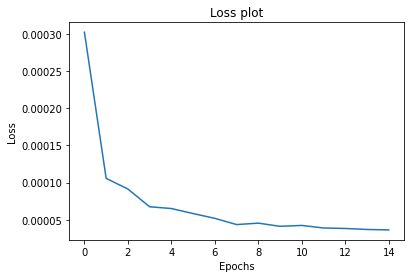

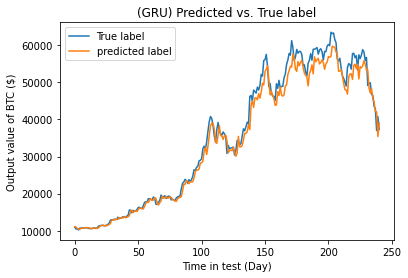

In [103]:
%time
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

results_test = model.predict(x_test)
arr_y_test = output_inversed(scaler, y_test)
arr_results_test = output_inversed(scaler, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

plt.xlabel('Time in test (Day)')
plt.ylabel('Output value of BTC ($)')
plt.title('(GRU) Predicted vs. True label')
plt.show()

In [115]:
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )

results = model.evaluate(x_test, y_test)
print(np.mean(history.history['val_loss']))

Epoch 1/15
73/73 [==============================] - 4s 24ms/step - loss: 5.8104e-04 - mae: 0.0131 - val_loss: 4.2770e-04 - val_mae: 0.0192
Epoch 2/15
73/73 [==============================] - 1s 16ms/step - loss: 9.1216e-05 - mae: 0.0063 - val_loss: 4.9300e-05 - val_mae: 0.0047
Epoch 3/15
73/73 [==============================] - 1s 17ms/step - loss: 8.2273e-05 - mae: 0.0058 - val_loss: 4.2750e-04 - val_mae: 0.0177
Epoch 4/15
73/73 [==============================] - 1s 16ms/step - loss: 6.8660e-05 - mae: 0.0051 - val_loss: 1.0707e-04 - val_mae: 0.0083
Epoch 5/15
73/73 [==============================] - 1s 17ms/step - loss: 5.7958e-05 - mae: 0.0044 - val_loss: 5.8811e-05 - val_mae: 0.0060
Epoch 6/15
73/73 [==============================] - 1s 16ms/step - loss: 4.7900e-05 - mae: 0.0044 - val_loss: 4.8555e-05 - val_mae: 0.0051
Epoch 7/15
73/73 [==============================] - 1s 17ms/step - loss: 4.1308e-05 - mae: 0.0039 - val_loss: 1.0121e-04 - val_mae: 0.0081
Epoch 8/15
73/73 [=========

The best optimizer : adam & the best loss function is MSE

## Dropout effect

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_25 (GRU)                 (None, 100)               32100     
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 202       
Total params: 32,302
Trainable params: 32,302
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
73/73 [==============================] - 7s 44ms/step - loss: 0.0013 - mae: 0.0185 - val_loss: 6.8051e-05 - val_mae: 0.0056
Epoch 2/15
73/73 [==============================] - 2s 30ms/step - loss: 6.9382e-05 - mae: 0.0044 - val_loss: 5.6645e-05 - val_mae: 0.0054
Epoch 3/15
73/73 [==============================] - 2s 30ms/step - loss: 5.0447e-05 - mae: 0.0037 - val_loss: 7.7119e-05 - val_mae: 0.0066
Epoch 4/15
73/73 [================

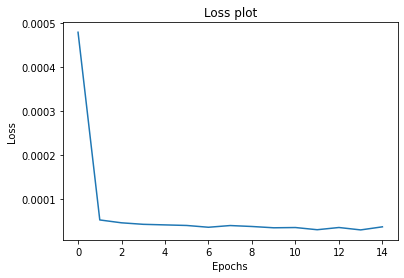

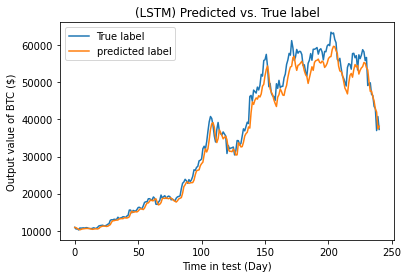

8/8 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0302
5.733700842635396e-05


In [118]:
# dropout for GRU
%time
model = Sequential()
model.add(GRU(100, batch_input_shape=(None, 24,5 ), recurrent_dropout=0.2))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

results_test = model.predict(x_test)
arr_y_test = output_inversed(scaler, y_test)
arr_results_test = output_inversed(scaler, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

plt.xlabel('Time in test (Day)')
plt.ylabel('Output value of BTC ($)')
plt.title('(LSTM) Predicted vs. True label')
plt.show()

results = model.evaluate(x_test, y_test)
print(np.mean(history.history['val_loss']))

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.3 µs
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 24, 50)            11200     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 102       
Total params: 31,502
Trainable params: 31,502
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
73/73 [==============================] - 13s 70ms/step - loss: 8.2970e-04 - mae: 0.0177 - val_loss: 3.3692e-04 - val_mae: 0.0151
Epoch 2/15
73/73 [==============================] - 3s 45ms/step - loss: 1.3766e-04 - mae: 0.0063 - val_loss: 1.9989e-04 - val_mae: 0.0110
Epoch 3/15
73/73 [==================

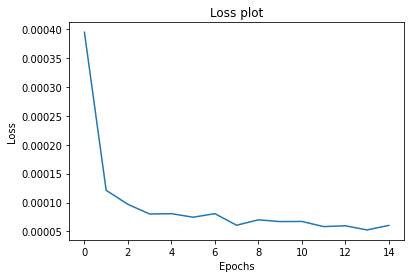

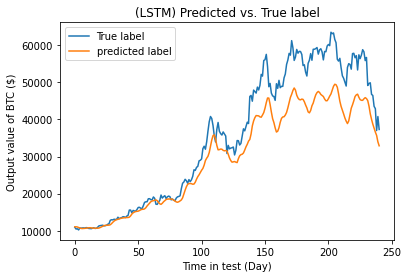

8/8 [==============================] - 0s 9ms/step - loss: 0.0152 - mae: 0.0920
0.00012305842392379418


In [119]:
# dropout for LSTM
%time
model = Sequential()
model.add(LSTM(50, batch_input_shape=(None, 24, 5), return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(50, return_sequences=False, recurrent_dropout=0.2))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

results_test = model.predict(x_test)
arr_y_test = output_inversed(scaler, y_test)
arr_results_test = output_inversed(scaler, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

plt.xlabel('Time in test (Day)')
plt.ylabel('Output value of BTC ($)')
plt.title('(LSTM) Predicted vs. True label')
plt.show()
results = model.evaluate(x_test, y_test)
print(np.mean(history.history['val_loss']))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 100)               10600     
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 202       
Total params: 10,802
Trainable params: 10,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
73/73 [==============================] - 3s 17ms/step - loss: 0.0017 - mae: 0.0220 - val_loss: 8.6000e-05 - val_mae: 0.0072
Epoch 2/15
73/73 [==============================] - 1s 9ms/step - loss: 9.4831e-05 - mae: 0.0057 - val_loss: 5.4986e-05 - val_mae: 0.0054
Epoch 3/15
73/73 [==============================] - 1s 9ms/step - loss: 5.3262e-05 - mae: 0.0039 - val_loss: 5.9217e-05 - val_mae: 0.0057
Epoch 4/15
73/73 [===================

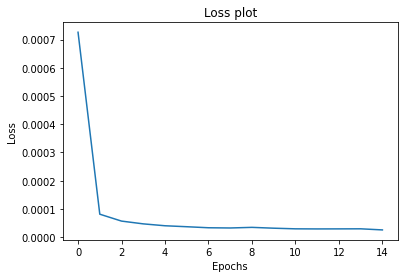

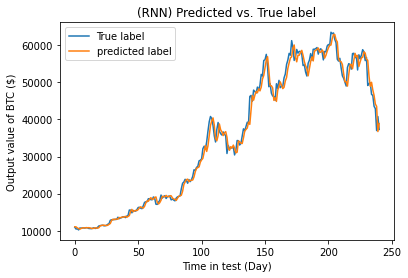

8/8 [==============================] - 0s 3ms/step - loss: 0.0017 - mae: 0.0289
5.299020388823313e-05


In [120]:
# dropout for RNN
%time
model = Sequential()
model.add(SimpleRNN(units=100, input_shape=x_train.shape[1:], activation="relu", recurrent_dropout=0.2))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

results_test = model.predict(x_test)
arr_y_test = output_inversed(scaler, y_test)
arr_results_test = output_inversed(scaler, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

plt.xlabel('Time in test (Day)')
plt.ylabel('Output value of BTC ($)')
plt.title('(RNN) Predicted vs. True label')
plt.show()
results = model.evaluate(x_test, y_test)
print(np.mean(history.history['val_loss']))

##MLP

In [144]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from keras.layers import Activation, Dense, Flatten 
%time
input_shape = (24*5,)
model = Sequential()
# model.add(Flatten())
model.add(Dense(256, activation='linear' , input_shape = input_shape))
model.add(Activation('relu'))

model.add(Dense(100, activation='linear'))
model.add(Activation('relu'))

model.add(Dense(100, activation='linear'))
model.add(Activation('relu'))

model.add(Dense(32,activation='linear'))
model.add(Activation('relu'))

model.add(Dense(1,activation='linear'))

model.compile(loss='mse', optimizer='adam')
model.build(input_shape)

model.summary()


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 256)               30976     
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 100)               25700     
_________________________________________________________________
activation_10 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_11 (Activation)   (None, 100)               0         
_______________________________________________________

In [141]:
new_x_trainn = x_train.reshape(2167,24*5)
type(x_train)

numpy.ndarray

In [148]:
%time
history = model.fit(x_train.reshape(2167,24*5), y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
Epoch 1/15
73/73 [==============================] - 0s 3ms/step - loss: 5.4520e-05 - val_loss: 9.8737e-05
Epoch 2/15
73/73 [==============================] - 0s 3ms/step - loss: 4.0823e-05 - val_loss: 1.0775e-04
Epoch 3/15
73/73 [==============================] - 0s 3ms/step - loss: 4.2825e-05 - val_loss: 6.3561e-05
Epoch 4/15
73/73 [==============================] - 0s 3ms/step - loss: 5.2966e-05 - val_loss: 6.4525e-05
Epoch 5/15
73/73 [==============================] - 0s 3ms/step - loss: 3.8262e-05 - val_loss: 1.7249e-04
Epoch 6/15
73/73 [==============================] - 0s 3ms/step - loss: 3.9903e-05 - val_loss: 6.2514e-05
Epoch 7/15
73/73 [==============================] - 0s 3ms/step - loss: 5.5026e-05 - val_loss: 2.4411e-04
Epoch 8/15
73/73 [==============================] - 0s 4ms/step - loss: 4.4812e-05 - val_loss: 1.1577e-04
Epoch 9/15
73/73 [==============================] - 0s 3ms/step - loss: 2.9424e-05 - val

In [149]:
''' Results '''
results_train = model.evaluate(x_train.reshape(2167,24*5), y_train)
results_test = model.evaluate(x_test.reshape(241,24*5), y_test)

print(results_train  , results_test )

8/8 [==============================] - 0s 2ms/step - loss: 0.0031
3.5785866202786565e-05 0.0031131450086832047


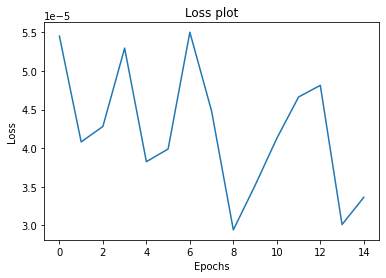

In [150]:

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [128]:
def output_inversed(scaler1, y_test1):
    arr = np.zeros((len(y_test1), 5))
    arr[:, 3:] = y_test1[:, :]
    arr_y_test = scaler1.inverse_transform(arr)
    arr_y_test = arr_y_test[:, 4:]
    # print(arr_y_test.shape)
    return arr_y_test


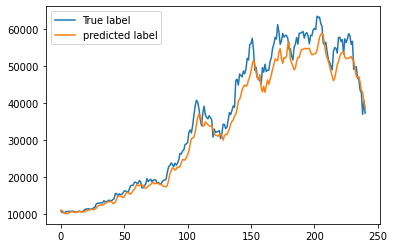

In [151]:
results_test = model.predict(x_test.reshape(241,24*5))
arr_y_test = output_inversed(scaler, y_test)
arr_results_test = output_inversed(scaler, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

train loss: 4.1567393054720014e-05
test loss: [0.1754379]


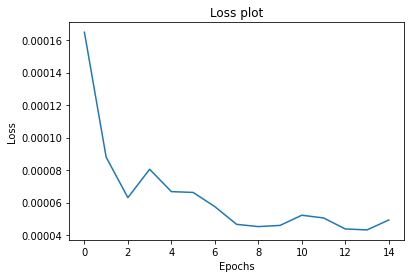

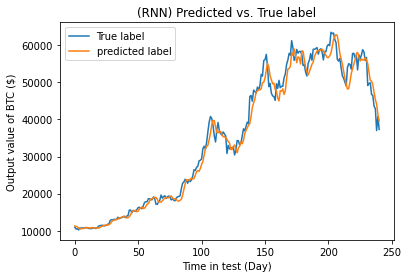

In [131]:
print('train loss: {}'.format(results_train))
print('test loss: {}'.format(results_test[0]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

results_test = model.predict(x_test.reshape(241,24*5))
arr_y_test = output_inversed(scaler, y_test)
arr_results_test = output_inversed(scaler, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

plt.xlabel('Time in test (Day)')
plt.ylabel('Output value of BTC ($)')
plt.title('(RNN) Predicted vs. True label')
plt.show()


In [135]:

results = model.evaluate(x_test.reshape(241,24*5), y_test)


8/8 [==============================] - 0s 2ms/step - loss: 0.0013
{'loss': [0.00016483431681990623, 8.794361929176375e-05, 6.303075497271493e-05, 8.050944597925991e-05, 6.674614269286394e-05, 6.625069363508373e-05, 5.750112177338451e-05, 4.66128985863179e-05, 4.522553717833944e-05, 4.5956792746437714e-05, 5.222197069087997e-05, 5.0548911531222984e-05, 4.3778396502602845e-05, 4.3181316868867725e-05, 4.928717316943221e-05], 'val_loss': [0.0001436808379366994, 0.00018075360276270658, 0.00022782367886975408, 7.793574332026765e-05, 0.00011824283137684688, 0.0002500599657651037, 0.00011785596143454313, 0.00014600949361920357, 0.00011413005267968401, 7.414832361973822e-05, 0.00023598289408255368, 6.978514284128323e-05, 6.238586502149701e-05, 0.0001329448277829215, 9.862266597338021e-05]}


##7

In [152]:
#7
from keras.layers import GRU , SimpleRNN
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from keras.layers import Activation, Dense, Flatten 


In [153]:
x_train.shape[1]

24

In [161]:
model = Sequential()
model.add(GRU(50, input_shape=(x_train.shape[1],5 ), return_sequences=True))
model.add(GRU(100, return_sequences=True  , recurrent_dropout=0.0))
model.add(GRU(100, return_sequences=False  , recurrent_dropout=0.0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()



Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_32 (GRU)                 (None, 24, 50)            8550      
_________________________________________________________________
gru_33 (GRU)                 (None, 24, 100)           45600     
_________________________________________________________________
gru_34 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_52 (Dense)             (None, 2)                 202       
Total params: 114,952
Trainable params: 114,952
Non-trainable params: 0
_________________________________________________________________


In [155]:
def output_inversed(scaler1, y_test1):
    arr = np.zeros((len(y_test1), 5))
    arr[:, 3:] = y_test1[:, :]
    arr_y_test = scaler1.inverse_transform(arr)
    arr_y_test = arr_y_test[:, 4:]
    # print(arr_y_test.shape)
    return arr_y_test

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
Epoch 1/15
73/73 [==============================] - 11s 64ms/step - loss: 9.8176e-04 - mae: 0.0193 - val_loss: 1.1090e-04 - val_mae: 0.0074
Epoch 2/15
73/73 [==============================] - 3s 46ms/step - loss: 6.8521e-05 - mae: 0.0048 - val_loss: 9.6821e-05 - val_mae: 0.0069
Epoch 3/15
73/73 [==============================] - 3s 46ms/step - loss: 4.7146e-05 - mae: 0.0039 - val_loss: 7.1624e-05 - val_mae: 0.0057
Epoch 4/15
73/73 [==============================] - 3s 45ms/step - loss: 5.6075e-05 - mae: 0.0046 - val_loss: 1.0081e-04 - val_mae: 0.0075
Epoch 5/15
73/73 [==============================] - 3s 45ms/step - loss: 6.3306e-05 - mae: 0.0051 - val_loss: 6.5821e-05 - val_mae: 0.0056
Epoch 6/15
73/73 [==============================] - 3s 46ms/step - loss: 5.0121e-05 - mae: 0.0041 - val_loss: 5.2826e-05 - val_mae: 0.0050
Epoch 7/15
73/73 [==============================] - 3s 46ms/step - loss: 5.3115e-05 - mae: 0.0038 - v

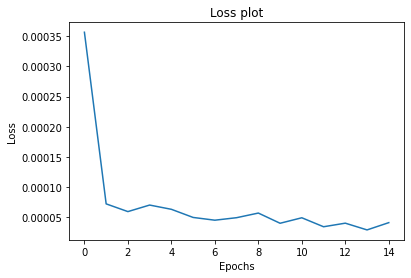

In [162]:
%time
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



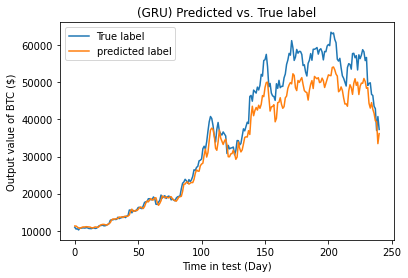

8/8 [==============================] - 0s 12ms/step - loss: 0.0052 - mae: 0.0516
8.046462971833535e-05


In [164]:
results_test = model.predict(x_test)
arr_y_test = output_inversed(scaler, y_test)
arr_results_test = output_inversed(scaler, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

plt.xlabel('Time in test (Day)')
plt.ylabel('Output value of BTC ($)')
plt.title('(GRU) Predicted vs. True label')
plt.show()
results = model.evaluate(x_test, y_test)
print(np.mean(history.history['val_loss']))

In [ ]:
# with dropout

In [165]:
model = Sequential()
model.add(GRU(50, input_shape=(x_train.shape[1],5 ), return_sequences=True  , recurrent_dropout=0.1))
model.add(GRU(100, return_sequences=True  , recurrent_dropout=0.1))
model.add(GRU(100, return_sequences=False  , recurrent_dropout=0.1))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()



Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_35 (GRU)                 (None, 24, 50)            8550      
_________________________________________________________________
gru_36 (GRU)                 (None, 24, 100)           45600     
_________________________________________________________________
gru_37 (GRU)                 (None, 100)               60600     
_________________________________________________________________
dense_53 (Dense)             (None, 2)                 202       
Total params: 114,952
Trainable params: 114,952
Non-trainable params: 0
_________________________________________________________________


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11 µs
Epoch 1/15
73/73 [==============================] - 20s 129ms/step - loss: 6.2187e-04 - mae: 0.0143 - val_loss: 1.1834e-04 - val_mae: 0.0084
Epoch 2/15
73/73 [==============================] - 7s 90ms/step - loss: 8.4513e-05 - mae: 0.0057 - val_loss: 2.0784e-04 - val_mae: 0.0124
Epoch 3/15
73/73 [==============================] - 7s 91ms/step - loss: 8.8069e-05 - mae: 0.0063 - val_loss: 1.1126e-04 - val_mae: 0.0085
Epoch 4/15
73/73 [==============================] - 7s 90ms/step - loss: 7.2084e-05 - mae: 0.0050 - val_loss: 7.0793e-05 - val_mae: 0.0059
Epoch 5/15
73/73 [==============================] - 7s 90ms/step - loss: 7.9428e-05 - mae: 0.0051 - val_loss: 5.9959e-05 - val_mae: 0.0055
Epoch 6/15
73/73 [==============================] - 7s 90ms/step - loss: 4.6123e-05 - mae: 0.0041 - val_loss: 8.5833e-05 - val_mae: 0.0077
Epoch 7/15
73/73 [==============================] - 7s 90ms/step - loss: 4.6403e-05 - mae: 0.0040 - va

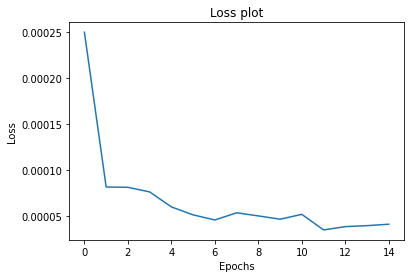

In [166]:
%time
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



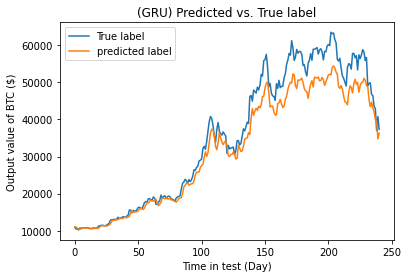

8/8 [==============================] - 0s 13ms/step - loss: 0.0067 - mae: 0.0602
0.00010776536995156978


In [167]:
results_test = model.predict(x_test)
arr_y_test = output_inversed(scaler, y_test)
arr_results_test = output_inversed(scaler, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

plt.xlabel('Time in test (Day)')
plt.ylabel('Output value of BTC ($)')
plt.title('(GRU) Predicted vs. True label')
plt.show()
results = model.evaluate(x_test, y_test)
print(np.mean(history.history['val_loss']))

In [ ]:
# 9: CNN-LSTM

##9: CNN-LSTM

In [168]:
from keras.layers import Conv1D ,MaxPooling1D

model = Sequential()
model.add(Conv1D(input_shape=x_train.shape[1:] , filters=256, kernel_size=3, strides=1, padding='valid', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, batch_input_shape=(None, 24, 5), return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(50, return_sequences=False, recurrent_dropout=0.2))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.build((None,25,4))
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 22, 256)           4096      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 256)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 11, 50)            61400     
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_54 (Dense)             (None, 2)                 102       
Total params: 85,798
Trainable params: 85,798
Non-trainable params: 0
_________________________________________________________________


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
Epoch 1/15
73/73 [==============================] - 13s 57ms/step - loss: 0.0017 - mae: 0.0234 - val_loss: 3.1566e-04 - val_mae: 0.0135
Epoch 2/15
73/73 [==============================] - 2s 31ms/step - loss: 1.6724e-04 - mae: 0.0067 - val_loss: 1.7918e-04 - val_mae: 0.0095
Epoch 3/15
73/73 [==============================] - 2s 31ms/step - loss: 1.6889e-04 - mae: 0.0070 - val_loss: 2.5827e-04 - val_mae: 0.0123
Epoch 4/15
73/73 [==============================] - 2s 32ms/step - loss: 1.3685e-04 - mae: 0.0067 - val_loss: 3.0429e-04 - val_mae: 0.0141
Epoch 5/15
73/73 [==============================] - 2s 31ms/step - loss: 1.2976e-04 - mae: 0.0061 - val_loss: 1.4692e-04 - val_mae: 0.0092
Epoch 6/15
73/73 [==============================] - 2s 31ms/step - loss: 1.1579e-04 - mae: 0.0060 - val_loss: 3.6140e-04 - val_mae: 0.0164
Epoch 7/15
73/73 [==============================] - 2s 31ms/step - loss: 1.2428e-04 - mae: 0.0063 - val_l

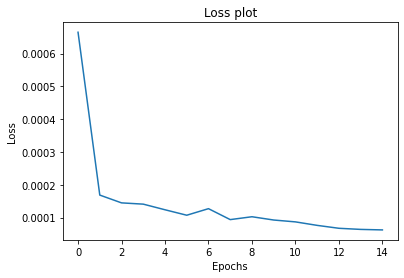

In [169]:
%time
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

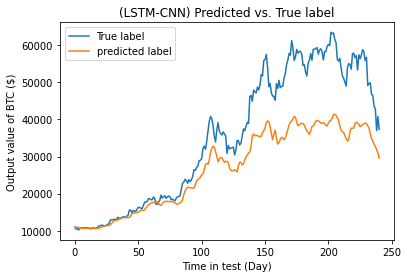

8/8 [==============================] - 0s 8ms/step - loss: 0.0346 - mae: 0.1405
0.0002104047608251373


In [170]:
results_test = model.predict(x_test)
arr_y_test = output_inversed(scaler, y_test)
arr_results_test = output_inversed(scaler, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

plt.xlabel('Time in test (Day)')
plt.ylabel('Output value of BTC ($)')
plt.title('(LSTM-CNN) Predicted vs. True label')
plt.show()
results = model.evaluate(x_test, y_test)
print(np.mean(history.history['val_loss']))

In [ ]:
#10

##10

In [208]:
def data_loader():
    a = os.path.isfile('BTC.csv')
    if a is False:
        start = datetime.datetime(2014, 9, 20)
        end = datetime.datetime(2021, 5, 20) 
        df = pdr.get_data_yahoo(['BTC-USD'], start=start, end=end) 
        df.to_csv(r'BTC.csv', sep='\t', encoding='utf-8', header='true')
        df = pd.read_csv('BTC.csv', sep='\t')
    else:
        df = pd.read_csv('BTC.csv', sep='\t')
    return df

In [209]:
df = data_loader()

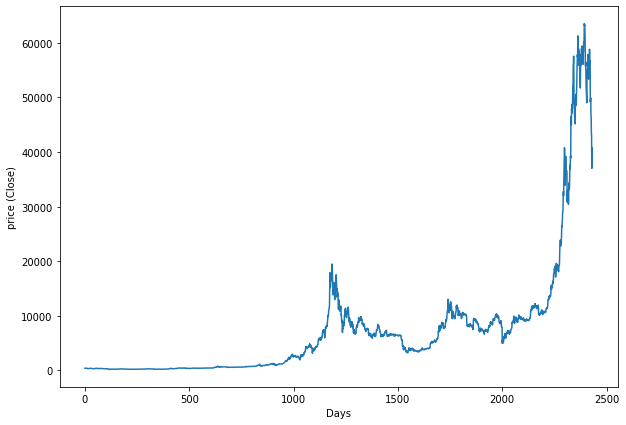

In [210]:
data_close = df['Close'][2:].to_numpy().astype(np.float)
plt.figure(figsize = (10,7))

plt.plot(np.arange(df[2:].shape[0]),data_close )
plt.xlabel('Days')
plt.ylabel('price (Close)')
plt.show()


In [211]:

df2  =df[2:]

data = df2[['High', 'Low', 'Open', 'Volume','Close']].to_numpy()

print(data.shape)


(2432, 5)


In [ ]:
'''Scale data '''
from sklearn import preprocessing

# MinMax
pwr = preprocessing.PowerTransformer()
data = pwr.fit_transform(data.reshape(-1,1))
print(data)

# Normalize
# data = preprocessing.normalize(data)
# print(data.shape)
# print(data.std(axis=0))

[[-0.01712236]
 [-0.01712236]
 [-0.01712236]
 ...
 [-0.01712236]
 [ 3.77773373]
 [-0.01712236]]


In [ ]:
def data_for_training(data_s1, period1):
    a1 = np.arange(len(data_s1) - period1 + 1)
    data_list1 = []
    for i in range(len(a1)):
        sample_list = []
        for j in range(period1):
            value1 = data_s1[i + j]
            sample_list.append(value1)
        data_list1.append(sample_list)
    data_list1 = np.array(data_list1)
    # np.random.shuffle(data_list1)
    return data_list1



In [ ]:
period = 25
data_list = data_for_training(data, period)
print(data_list.shape)
target_list = np.zeros((len(data_list), 1))
for i in range(len(data_list)):
    value = data_list[i][24][0]
    target_list[i][0] = value

data_list = data_list[:, :24, :]
print(data_list.shape)
print(target_list.shape)
print(target_list)



(12136, 25, 1)
(12136, 24, 1)
(12136, 1)
[[-0.01712236]
 [-0.01712236]
 [-0.01712236]
 ...
 [-0.01712236]
 [ 3.77773373]
 [-0.01712236]]


In [ ]:
''' Split data '''
my_test_size = 0.1
ratio_train = int((1 - my_test_size) * len(data_list))
x_train = data_list[:ratio_train]
x_test = data_list[ratio_train:]
y_train = target_list[:ratio_train]
y_test = target_list[ratio_train:]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split

In [ ]:
#GRU

In [ ]:
model = Sequential()
model.add(GRU(100, batch_input_shape=(None, 24,1 ), recurrent_dropout=0))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_51 (GRU)                 (None, 100)               30900     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 101       
Total params: 31,001
Trainable params: 31,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )


Epoch 1/15
365/365 [==============================] - 8s 16ms/step - loss: 0.7183 - mae: 0.3503 - val_loss: 0.0105 - val_mae: 0.0480
Epoch 2/15
365/365 [==============================] - 5s 15ms/step - loss: 0.6806 - mae: 0.2980 - val_loss: 0.0120 - val_mae: 0.0504
Epoch 3/15
365/365 [==============================] - 5s 14ms/step - loss: 0.7085 - mae: 0.3090 - val_loss: 0.0135 - val_mae: 0.0532
Epoch 4/15
365/365 [==============================] - 5s 15ms/step - loss: 0.6685 - mae: 0.2952 - val_loss: 0.0152 - val_mae: 0.0560
Epoch 5/15
365/365 [==============================] - 5s 15ms/step - loss: 0.6703 - mae: 0.2965 - val_loss: 0.0217 - val_mae: 0.0655
Epoch 6/15
365/365 [==============================] - 5s 15ms/step - loss: 0.7070 - mae: 0.3044 - val_loss: 0.0265 - val_mae: 0.0727
Epoch 7/15
365/365 [==============================] - 5s 14ms/step - loss: 0.7048 - mae: 0.3030 - val_loss: 0.0129 - val_mae: 0.0518
Epoch 8/15
365/365 [==============================] - 5s 15ms/step - 

38/38 [==============================] - 0s 4ms/step - loss: 0.0374 - mae: 0.0647
train loss: 0.5503987669944763, train acc: 0.2452835887670517
test loss: 0.03743861988186836, test acc: 0.06473147124052048


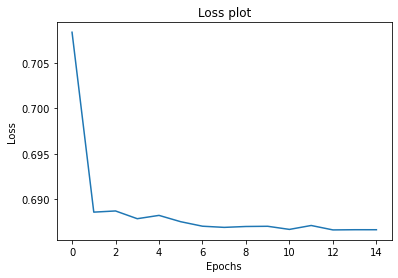

In [ ]:
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [ ]:


def output_inversed(scaler1, y_test1):
    arr = np.zeros((len(y_test1), 1))
    arr[:, 0:] = y_test1[:, :]
    arr_y_test = scaler1.inverse_transform(arr)
    arr_y_test = arr_y_test[:, 0:]
    return arr_y_test


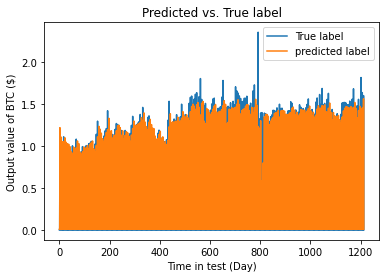

In [ ]:
results_test = model.predict(x_test)
arr_y_test = output_inversed(pwr, y_test)
arr_results_test = output_inversed(pwr, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

plt.xlabel('Time in test (Day)')
plt.ylabel('Output value of BTC ($)')
plt.title('Predicted vs. True label')
plt.show()


38/38 [==============================] - 0s 4ms/step - loss: 0.0374 - mae: 0.0647


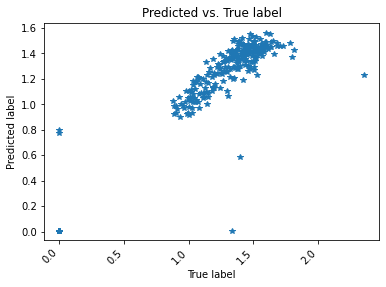

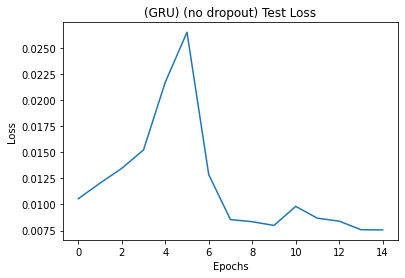

In [ ]:

results = model.evaluate(x_test, y_test)
plt.plot(arr_y_test, arr_results_test, '*')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Predicted vs. True label')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('(GRU) (no dropout) Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Standard

In [181]:
#GRU

In [183]:
%time
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
Epoch 1/15
365/365 [==============================] - 9s 18ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 2/15
365/365 [==============================] - 6s 16ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 3/15
365/365 [==============================] - 6s 16ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 4/15
365/365 [==============================] - 6s 16ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 5/15
365/365 [==============================] - 6s 16ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 6/15
365/365 [==============================] - 6s 16ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 7/15
365/365 [======================

In [188]:
#standard

In [189]:
df = data_loader()

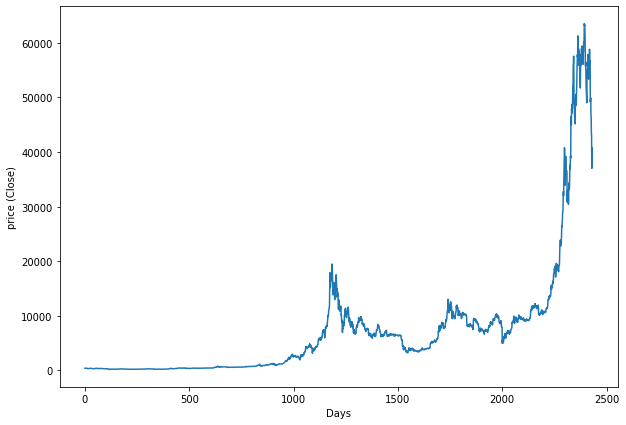

In [190]:
data_close = df['Close'][2:].to_numpy().astype(np.float)
plt.figure(figsize = (10,7))

plt.plot(np.arange(df[2:].shape[0]),data_close )
plt.xlabel('Days')
plt.ylabel('price (Close)')
plt.show()


In [191]:

df2  =df[2:]

data = df2[['High', 'Low', 'Open', 'Volume','Close']].to_numpy()

print(data.shape)


(2432, 5)


In [192]:
'''Scale data '''
from sklearn import preprocessing


standard = preprocessing.StandardScaler()
data = standard.fit_transform(data)
print(data)

# Normalize
# data = preprocessing.normalize(data)
# print(data.shape)
# print(data.std(axis=0))

[[-0.61231726 -0.61834496 -0.61546647 -0.63249303 -0.61476382]
 [-0.61323653 -0.61804655 -0.61429702 -0.63301828 -0.61564202]
 [-0.61370251 -0.61768923 -0.61508046 -0.63314355 -0.6153519 ]
 ...
 [ 3.03456578  2.12251312  3.09468444  5.81968369  2.57241568]
 [ 2.94296559  2.51784171  2.55483661  3.87484771  2.90166739]
 [ 2.91837167  2.38807509  2.88994946  3.55661802  2.59874068]]


In [193]:
period = 25
data_list = data_for_training(data, period)
print(data_list.shape)
target_list = np.zeros((len(data_list), 1))
for i in range(len(data_list)):
    value = data_list[i][24][4]
    target_list[i][0] = value

data_list = data_list[:, :24, :]
print(data_list.shape)
print(target_list.shape)
print(target_list)




(2408, 25, 5)
(2408, 24, 5)
(2408, 1)
[[-0.61546356]
 [-0.61599459]
 [-0.61705865]
 ...
 [ 2.57241568]
 [ 2.90166739]
 [ 2.59874068]]


In [194]:
''' Split data '''
my_test_size = 0.1
ratio_train = int((1 - my_test_size) * len(data_list))
x_train = data_list[:ratio_train]
x_test = data_list[ratio_train:]
y_train = target_list[:ratio_train]
y_test = target_list[ratio_train:]


In [195]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split

In [196]:
#GRU

In [197]:
model = Sequential()
model.add(GRU(100, batch_input_shape=(None, 24,5 ), recurrent_dropout=0))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_39 (GRU)                 (None, 100)               32100     
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 101       
Total params: 32,201
Trainable params: 32,201
Non-trainable params: 0
_________________________________________________________________


In [198]:
%time
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs
Epoch 1/15
73/73 [==============================] - 4s 24ms/step - loss: 0.2316 - mae: 0.4228 - val_loss: 0.0027 - val_mae: 0.0350
Epoch 2/15
73/73 [==============================] - 1s 17ms/step - loss: 0.2248 - mae: 0.4114 - val_loss: 0.0025 - val_mae: 0.0332
Epoch 3/15
73/73 [==============================] - 1s 17ms/step - loss: 0.2250 - mae: 0.4125 - val_loss: 0.0027 - val_mae: 0.0350
Epoch 4/15
73/73 [==============================] - 1s 17ms/step - loss: 0.2208 - mae: 0.4052 - val_loss: 0.0025 - val_mae: 0.0357
Epoch 5/15
73/73 [==============================] - 1s 17ms/step - loss: 0.2190 - mae: 0.4032 - val_loss: 0.0029 - val_mae: 0.0382
Epoch 6/15
73/73 [==============================] - 1s 17ms/step - loss: 0.2185 - mae: 0.4015 - val_loss: 0.0020 - val_mae: 0.0293
Epoch 7/15
73/73 [==============================] - 1s 17ms/step - loss: 0.2225 - mae: 0.4069 - val_loss: 0.0020 - val_mae: 0.0288
Epoch 8/15
73/73 [==

8/8 [==============================] - 0s 5ms/step - loss: 0.7670 - mae: 0.6590
train loss: 0.17835168540477753, train acc: 0.3317294120788574
test loss: 0.7670052647590637, test acc: 0.6590198874473572


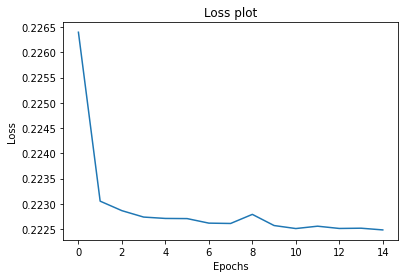

In [199]:
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [200]:


def output_inversed(scaler1, y_test1):
    arr = np.zeros((len(y_test1), 5))
    arr[:, 0:] = y_test1[:, :]
    arr_y_test = scaler1.inverse_transform(arr)
    arr_y_test = arr_y_test[:, 4:]
    return arr_y_test


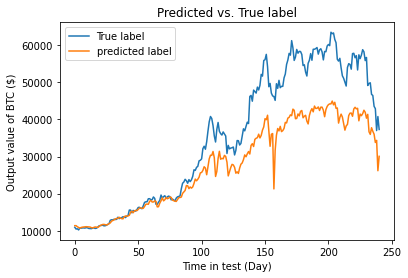

8/8 [==============================] - 0s 7ms/step - loss: 0.7670 - mae: 0.6590
0.0022788586483026545


In [201]:
results_test = model.predict(x_test)
arr_y_test = output_inversed(standard, y_test)
arr_results_test = output_inversed(standard, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

plt.xlabel('Time in test (Day)')
plt.ylabel('Output value of BTC ($)')
plt.title('Predicted vs. True label')
plt.show()
results = model.evaluate(x_test, y_test)
print(np.mean(history.history['val_loss']))

## 11

In [213]:
def data_loader():
    a = os.path.isfile('BTC.csv')
    if a is False:
        start = datetime.datetime(2014, 9, 20)
        end = datetime.datetime(2021, 5, 20) 
        df = pdr.get_data_yahoo(['BTC-USD'], start=start, end=end) 
        df.to_csv(r'BTC.csv', sep='\t', encoding='utf-8', header='true')
        df = pd.read_csv('BTC.csv', sep='\t')
    else:
        df = pd.read_csv('BTC.csv', sep='\t')
    return df

In [214]:
df = data_loader()

In [215]:
df.head()

,Attributes,Adj Close,Close,High,Low,Open,Volume
0,Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,408.90399169921875,408.90399169921875,423.2959899902344,389.88299560546875,394.6730041503906,36863600.0
3,2014-09-20,398.8210144042969,398.8210144042969,412.4259948730469,393.1809997558594,408.0849914550781,26580100.0
4,2014-09-21,402.1520080566406,402.1520080566406,406.9159851074219,397.1300048828125,399.1000061035156,24127600.0


In [216]:
df.describe()

,Attributes,Adj Close,Close,High,Low,Open,Volume
count,2434,2433,2433,2433,2433,2433,2433
unique,2427,2430,2430,2430,2432,2429,2433
top,2017-03-26,1179.969970703125,1179.969970703125,6536.919921875,429.0769958496094,314.0790100097656,12545400.0
freq,2,2,2,2,2,2,1


In [217]:
df.isna().sum()

Attributes    0
Adj Close     1
Close         1
High          1
Low           1
Open          1
Volume        1
dtype: int64

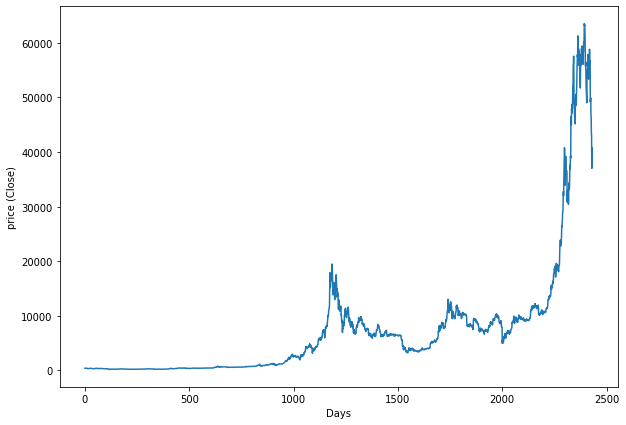

In [218]:
data_close = df['Close'][2:].to_numpy().astype(np.float)
plt.figure(figsize = (10,7))

plt.plot(np.arange(df[2:].shape[0]),data_close )
plt.xlabel('Days')
plt.ylabel('price (Close)')
plt.show()


In [219]:


df2  =df[2:]

# data = df2[['High', 'Low', 'Open', 'Volume', 'Adj Close','Close']].to_numpy()
data = df2[['High', 'Low', 'Open', 'Volume','Close']].to_numpy()

print(data.shape)


(2432, 5)


In [220]:
'''Scale data '''
from sklearn import preprocessing

# MinMax
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
print(data)

# Normalize
# data = preprocessing.normalize(data)
# print(data.shape)
# print(data.std(axis=0))

[[3.27239776e-03 3.52001870e-03 3.43783436e-03 8.81834148e-05
  3.64468542e-03]
 [3.10426527e-03 3.57318020e-03 3.64955737e-03 5.88825241e-05
  3.48546046e-03]
 [3.01903877e-03 3.63683538e-03 3.50771946e-03 5.18945886e-05
  3.53806172e-03]
 ...
 [6.70277961e-01 4.91799449e-01 6.75141304e-01 3.60016681e-01
  5.81510186e-01]
 [6.53524520e-01 5.62226598e-01 5.77404669e-01 2.51525869e-01
  6.41206605e-01]
 [6.49026355e-01 5.39108885e-01 6.38075103e-01 2.33773730e-01
  5.86283156e-01]]


In [221]:
def data_for_training(data_s1, period1):
    a1 = np.arange(len(data_s1) - period1 + 1)
    data_list1 = []
    for i in range(len(a1)):
        sample_list = []
        for j in range(period1):
            value1 = data_s1[i + j]
            sample_list.append(value1)
        data_list1.append(sample_list)
    data_list1 = np.array(data_list1)
    # np.random.shuffle(data_list1)
    return data_list1



In [222]:
period = 25
data_list = data_for_training(data, period)
print(data_list.shape)
target_list = np.zeros((len(data_list), 1))
for i in range(len(data_list)):
    value = data_list[i][24][4]
    target_list[i][0] = value

data_list = data_list[:, :24, :]
print(data_list.shape)
print(target_list.shape)
print(target_list)



(2408, 25, 5)
(2408, 24, 5)
(2408, 1)
[[0.00351782]
 [0.00342154]
 [0.00322861]
 ...
 [0.58151019]
 [0.64120661]
 [0.58628316]]


In [223]:
''' Split data '''
my_test_size = 0.1
ratio_train = int((1 - my_test_size) * len(data_list))
x_train = data_list[:ratio_train]
x_test = data_list[ratio_train:]
y_train = target_list[:ratio_train]
y_test = target_list[ratio_train:]


In [224]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM , GRU
from sklearn.model_selection import train_test_split

In [ ]:
#GRU(11)

In [244]:
# model = Sequential()
# model.add(GRU(100, batch_input_shape=(None, 24,5 ), recurrent_dropout=0))
# model.add(Dense(2, activation='relu'))
# model.compile(loss='mse', optimizer='adam', metrics=['mae'])
# model.summary()

In [245]:
# history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )


In [231]:
def output_inversed(scaler1, y_test1):
    arr = np.zeros((len(y_test1), 5))
    arr[:, 3:] = y_test1[:, :]
    arr_y_test = scaler1.inverse_transform(arr)
    arr_y_test = arr_y_test[:, 4:]
    # print(arr_y_test.shape)
    return arr_y_test


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11.2 µs
Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 24, 50)            11200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_70 (Dense)             (None, 2)                 102       
Total params: 31,502
Trainable params: 31,502
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
73/73 [==============================] - 7s 38ms/step - loss: 9.9711e-04 - mae: 0.0183 - val_loss: 2.0452e-04 - val_mae: 0.0106
Epoch 2/15
73/73 [==============================] - 2s 25ms/step - loss: 1.5049e-04 - mae: 0.0071 - val_loss: 1.5465e-04 - val_mae: 0.0090
Epoch 3/15
73/73 [===================

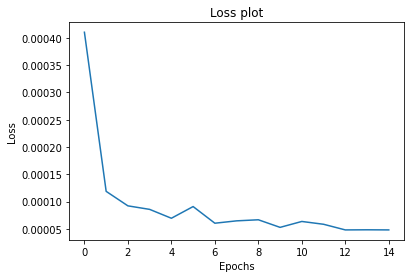

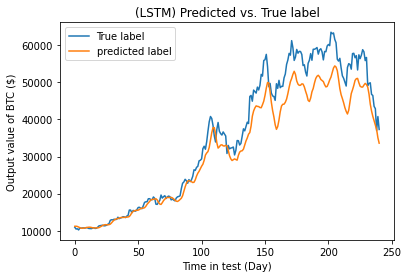

8/8 [==============================] - 0s 7ms/step - loss: 0.0080 - mae: 0.0657
0.00011913857548885668


In [243]:

%time
model = Sequential()
model = Sequential()
model.add(GRU(100, batch_input_shape=(None, 24,5 ), recurrent_dropout=0))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=24 )
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test[:,0,4], y_test)

# x_test = x_test[:1]

new = results_test
x_test[:,0,4] = new

results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))

plt.plot(history.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

results_test = model.predict(x_test)
arr_y_test = output_inversed(scaler, y_test)
arr_results_test = output_inversed(scaler, results_test)
plt.plot(np.arange(len(results_test)), arr_y_test[:, 0], label='True label')
plt.plot(np.arange(len(results_test)), arr_results_test[:, 0], label='predicted label')
plt.legend()

plt.xlabel('Time in test (Day)')
plt.ylabel('Output value of BTC ($)')
plt.title('(LSTM) Predicted vs. True label')
plt.show()

results = model.evaluate(x_test, y_test)
print(np.mean(history.history['val_loss']))

In [ ]:

results = model.evaluate(x_test, y_test)
plt.plot(arr_y_test, arr_results_test, '*')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Predicted vs. True label')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('(LSTM) (no dropout) Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()